In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
df = pd.read_csv('sales_pred.csv')

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Converting Year Column to Datetime to allow datetime operations

In [137]:
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'])

### Fixing The Ambiguity in 'Item_Fat_Content'

In [138]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [139]:
def labelfixer(x):
    a = ['Low Fat','low fat','LF']
#     b = ['Regular', 'reg']
    if x in a:
        return 'Low Fat'
    else:
        return 'Regular'

In [140]:
df['Item_Fat_Content']=df["Item_Fat_Content"].apply(labelfixer)

In [141]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Continuing with Univariate Analysis

#### Item_Visibility and Item_Weight

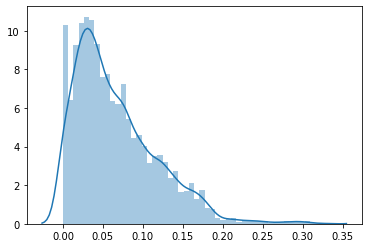

In [142]:
sns.distplot(df[["Item_Visibility"]])

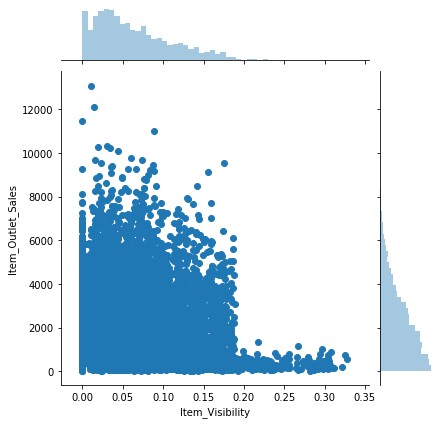

In [143]:
sns.jointplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df);

Scince there *are* sales for **0** item visibility the data is clearly wrong.
We need to impute the values for the item visibility
There are two ways to impute
1. To fill all zero visibilities with the mean visibility
2. To fill all zero visibilities with the group mean visibility.
We will choose the second option

In [144]:
# a = df['Item_Type'].unique()
# a

# meandfso = (df.groupby('Item_Type')['Item_Weight'].mean())
# 
# 
# for i in a:
#     d = {i:meandfso[i]}
#     s = df['Item_Type'].map(d)
#     df['Item_Weight'] = df['Item_Weight'].combine_first(s)
# meandfsoiw = df.groupby('Item_Type')['Item_Weight'].mean()
# meandfso
# Still cant understand this method so wont use it

In the cell below we use fillna, *but* for that we need to convert 0.000000 values to null
Also after that we give the fillna function a series object to access for item weight and use the group mean

In [145]:
df['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

In [146]:
df['Item_Visibility']=df['Item_Visibility'].replace(0.000000,np.nan)

In [147]:
df['Item_Visibility'] = df['Item_Visibility'].fillna(df.groupby(df['Item_Type'])['Item_Visibility'].transform('mean'))

In [148]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null datetime64[ns]
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 799.2+ KB


#### Item Type

In [150]:
dfitc = pd.DataFrame(df['Item_Type'].value_counts())
dfitc['Item_Type']=dfitc['Item_Type'].apply(lambda x: 100*x/dfitc.Item_Type.sum())
dfitc

,Item_Type
Fruits and Vegetables,14.455004
Snack Foods,14.079549
Household,10.676992
Frozen Foods,10.043412
Dairy,8.001877
Canned,7.614690
Baking Goods,7.602957
Health and Hygiene,6.101138
Soft Drinks,5.221166
Meat,4.986507


In [151]:
# We cant directly run this command, we need to conver these into counts
# sns.distplot(df[['Item_Type']])

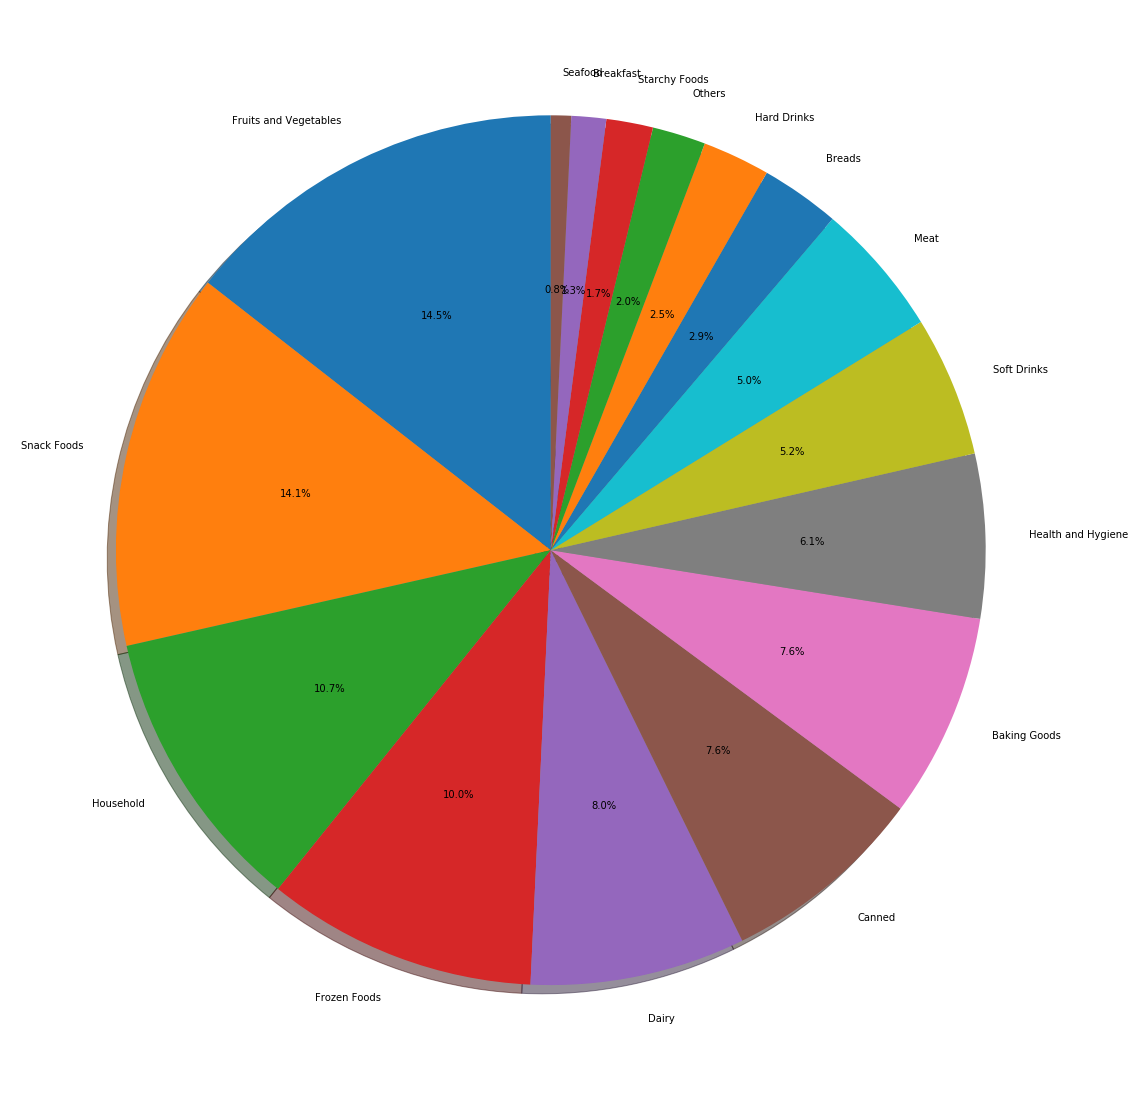

In [152]:
# dfitc.plot.pie(figsize=(10,10),subplots = True)
fig1, ax1 = plt.subplots(figsize=(120,20))
ax1.pie(dfitc['Item_Type'], labels=dfitc.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [153]:
df["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null datetime64[ns]
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 799.2+ KB


In [155]:
dfitc =df.groupby(df['Item_Type'])

In [156]:
dfitc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.064963,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
264,FDN01,8.895000,Low Fat,0.072546,Breakfast,176.2370,OUT045,1970-01-01 00:00:00.000002002,NaN,Tier 2,Supermarket Type1,1764.3700
713,FDH21,10.395000,Low Fat,0.031274,Seafood,160.0604,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,1267.6832
716,FDG21,17.350000,Regular,0.146896,Seafood,149.6050,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,3745.1250
866,FDJ57,7.420000,Regular,0.021570,Seafood,184.8582,OUT035,1970-01-01 00:00:00.000002004,Small,Tier 2,Supermarket Type1,4643.9550


In [157]:
df.loc[df["Item_Type"]=="Breads",'Item_Type']='Baking Goods'
df.loc[df["Item_Type"]=="Hard Drinks",'Item_Type']='Drinks'
df.loc[df["Item_Type"]=="Soft Drinks",'Item_Type']='Drinks'
df.loc[df["Item_Type"]=="Health and Hygiene",'Item_Type']='Household'
df.loc[df["Item_Type"]=="Seafood",'Item_Type']='Meat'
df.loc[df["Item_Type"]=="Starchy Foods",'Item_Type']='Breakfast'
df.loc[df["Item_Type"]=="Others",'Item_Type']='Breakfast'
df.loc[df["Item_Type"]=="Frozen Foods" ,'Item_Type']='Long Shelf Life'
df.loc[df["Item_Type"]=="Canned" ,'Item_Type']='Long Shelf Life'

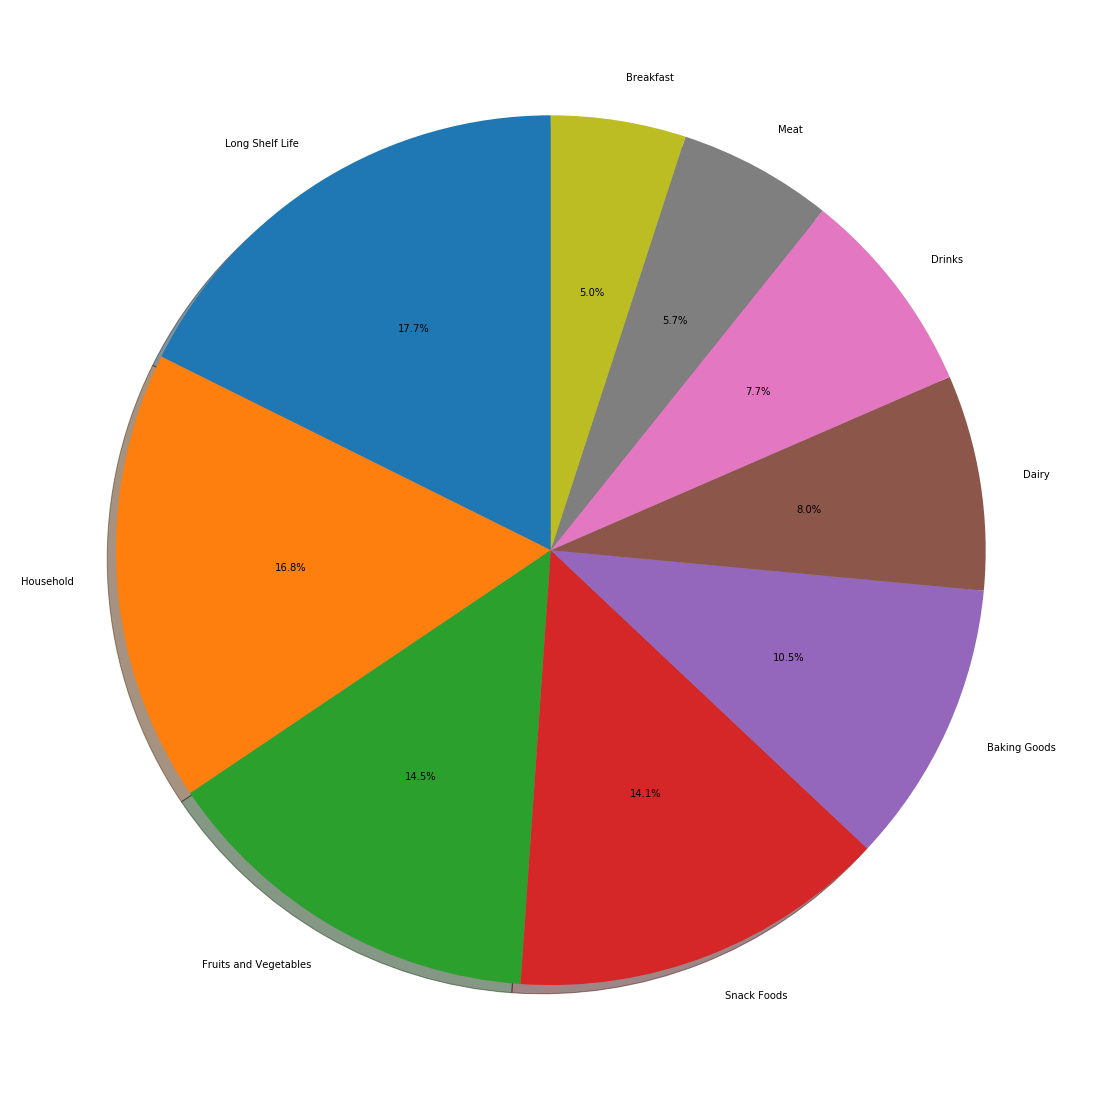

In [158]:
dfitc = pd.DataFrame(df['Item_Type'].value_counts())
dfitc['Item_Type']=dfitc['Item_Type'].apply(lambda x: 100*x/dfitc.Item_Type.sum())
fig1, ax1 = plt.subplots(figsize=(120,20))
ax1.pie(dfitc['Item_Type'], labels=dfitc.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Imputing the mode values for missing outlet type acc to mode values of outlet size

In [159]:
from scipy.stats import mode
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x :mode(x).mode[0])

In [160]:
df.loc[df['Outlet_Size'].isnull(),'Outlet_Size'] = df.loc[df['Outlet_Size'].isnull(),'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null datetime64[ns]
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 799.2+ KB


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
# df['Outlet'] = (df['Outlet_Identifier'].map(lambda x: x[3:]))
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Type']#, 'Outlet'
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'
                              ])
# 'Item_Type_Combined','Outlet'

In [164]:
df.shape

(8523, 28)